In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import glob

In [139]:
antenna_files = glob.glob('/home/gbtdata/AGBT17A_259_03/Antenna/2017_04_10_*.fits')
antenna_files.sort()
antenna_files = antenna_files[7:]
antenna_files += glob.glob('/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_0[89]*.fits')
antenna_files.sort()

In [140]:
antenna_files

['/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:03:50.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:07:32.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:08:12.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:09:13.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:09:53.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:11:04.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:16:23.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:21:39.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:26:53.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:32:19.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:37:52.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:43:13.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:48:27.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:53:41.fits',
 '/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_08:59:02.fits',
 '/home/gb

In [141]:
az = []
el = []
ra = []
dec = []
dmjd = []
for fn in antenna_files:
    try:
        f = fits.open(fn)
    except:
        continue
    h = f[2]
    dmjd.extend(h.data['DMJD'])
    az.extend(h.data['MNT_AZ'])
    el.extend(h.data['MNT_EL'])
    ra.extend(h.data['RAJ2000'])
    dec.extend(h.data['DECJ2000'])
az = np.array(az)
el = np.array(el)
ra = np.array(ra)
dec = np.array(dec)
dmjd = np.array(dmjd)

In [144]:
bins_ra = np.arange(ra.min(), ra.max(), 2. / 60.)
bins_dec = np.arange(dec.min(), dec.max(), 2. / 60.)
stuff = np.histogram2d(ra, dec, bins=[bins_ra, bins_dec])
histo = stuff[0]

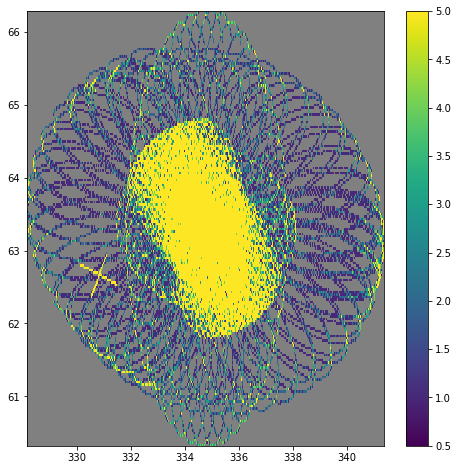

In [145]:
figure(figsize=(8, 8))
pck = pcolormesh(bins_ra, bins_dec, histo.T, cmap=cm.viridis)
pck.cmap.set_under('grey')
clim(0.5, 5)
colorbar()